#Fashion MNIST classification dataset

###Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

###Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

###To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
###For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

###Each training and test example is assigned to one of the following labels:

###0 T-shirt/top
###1 Trouser
###2 Pullover
###3 Dress
###4 Coat
###5 Sandal
###6 Shirt
###7 Sneaker
###8 Bag
###9 Ankle boot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# offline (for plotly)
import plotly.offline as pyo


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from sklearn.manifold import TSNE

# !pip install umap-learn
import umap
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/fashion-mnist_test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/fashion-mnist_train.csv")

In [ ]:
# Discover dataset
# First column shows the type of article of clothing (Dress, shoes, jacket, pants, etc.)
print(df_test.shape)
print(df_train.shape)
df_train.head(10)
df_train.describe()

(10000, 785)
(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

### Looks like there are 10 unique articles of clothing to decipher in clusters

### Split data into target and label sets


In [ ]:
# Training labels of which we will predict on
target_labels = df_train['label']
data = df_train.drop(['label'], axis = 1)
# print(target_labels.shape)

# Test labels of which we will predict on
test_labels = df_test['label'] 
test = df_test.drop(['label'], axis = 1)


0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       1  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...         0         0         0         0
59998   

In [ ]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {0 :'T-Shirt/Top', 1 :'Trouser',2 :'Pullover', 3 :'Dress', 4 :'Coat', 5 :'Sandal', 6 :'Shirt', 7 :'Sneaker', 8 :'Bag', 9 :'Ankle Boot'}
    labeled = label.map(mapping)
    return labeled

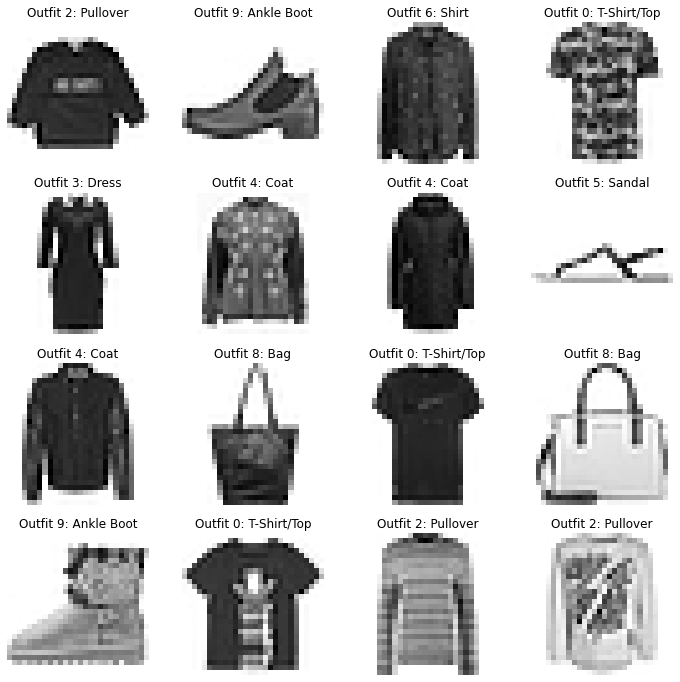

In [ ]:
# example of pictures with their correct label

fig, axes = plt.subplots(4, 4, figsize = (12,12))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(data.values.reshape((data.shape[0], 28, 28))[i], cmap=plt.get_cmap('binary'))
    axes[i].set_title("Outfit " + str(target_labels[i]) + ": "+ num_to_name(target_labels)[i])
    axes[i].axis('off')
plt.show()

In [ ]:
# # how much examples we have from each label
# target_labels.value_counts()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, target_labels, test_size=0.7, random_state=123)

# since we already split test_df into data and labels, we cant do more actions on it

X_test = test.copy()


In [ ]:
# Additional scaling options
# for infinity value cases
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

# Divide out pixels to include range between 0-1
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(18000, 784)
(42000, 784)
(10000, 784)


# Dimensionality Reduction Methods
### PCA 

In [ ]:
pca = PCA() # all 784 features
pca.fit(X_train)

PCA()

In [ ]:
# A graph to present the conection between the num of features & the explained variance: 
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Pixels", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

fig.show()

It looks like at 24 pixels (features) we get an 80% variance rate

In [ ]:
# we can try using svd_solver="randomized"

pca = PCA(n_components=0.80)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
print(X_val_reduced.shape)
print(X_train_reduced.shape)
print(X_train.shape)

(42000, 24)
(18000, 24)
(18000, 784)


In [ ]:
# 2D version: with x=0 and y=1
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=0, y=1, color = num_to_name(y_train),
    title="Total Explained Variance: {:.2f}%".format(total_var),
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

In [ ]:
# 2D version: with x=1 and y=2
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=1, y=2, color = num_to_name(y_train),
    title="Total Explained Variance: {:.2f}%".format(total_var),
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

In [ ]:
# 2D version: with x=2 and y=1
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=2, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

##t-SNE

In [ ]:

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 2.408s...
[t-SNE] Computed neighbors for 18000 samples in 643.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for 

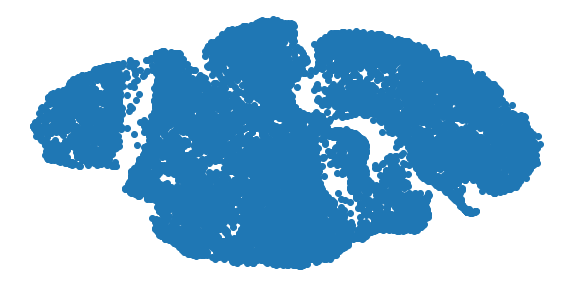

In [ ]:
# Scatter plot of results of t-SNE
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

##UMAP

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_train)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 16.795918464660645 seconds


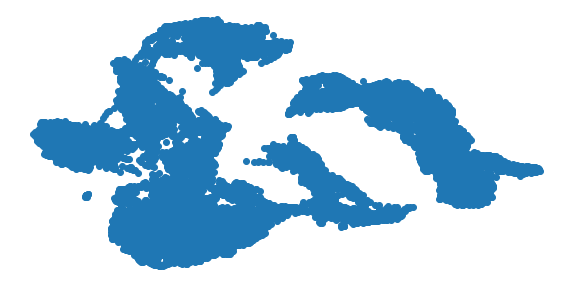

In [ ]:
# Scatter plot of results of UMAP{
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Based on the dimension reduction types of PCA, t-SNE, and UMAP, it looks
## like UMAP produced the most distinguished and separated classes most clearly, followed by t-SNE and PCA.

# Clustering Comparisons

##1. K-Means

In [ ]:
# Convert training set to dataframe
X_train = pd.DataFrame(X_train_reduced)
X_val = pd.DataFrame(X_val_reduced)

pca = PCA(24)
X_std = pca.fit_transform(X_train)
print(X_std.shape)

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_train)

(18000, 24)


In [ ]:
# Defining the k-means and calculate predicted values
kmeans_cluster = KMeans(n_clusters=10, random_state= 123)

# Fit Model
# %timeit kmeans_cluster.fit(X_train)
y_pred = kmeans_cluster.fit_predict(X_std)


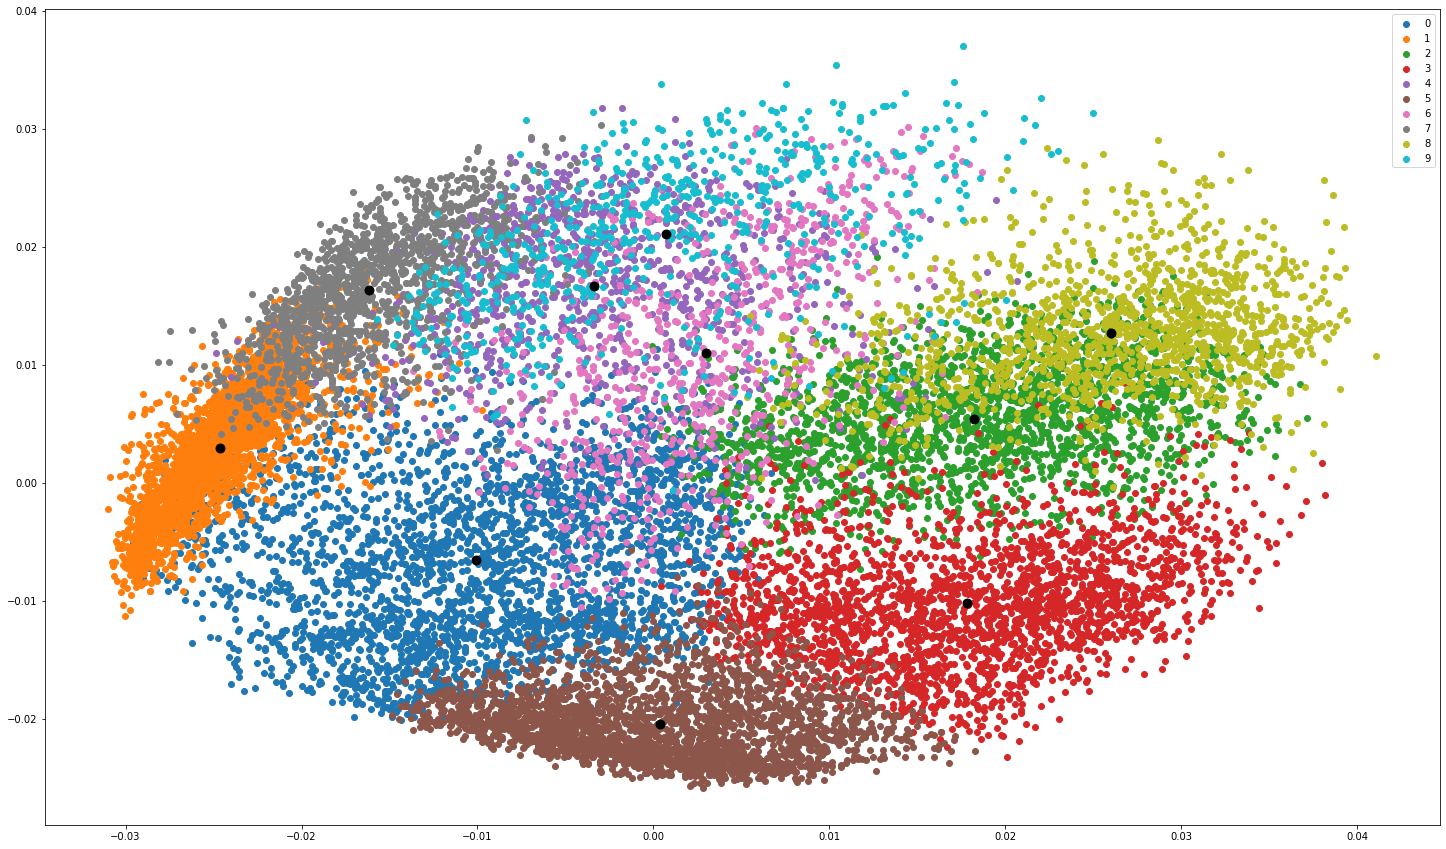

In [ ]:
u_labels = np.unique(y_pred)
centroids = kmeans_cluster.cluster_centers_

plt.figure(figsize=(25,15))

#plotting the results with cluster centroids
for i in u_labels:
  flabel = X_train[y_pred == i]
  plt.scatter(flabel.iloc[:,0].values , flabel.iloc[:,1].values, label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='k')
plt.legend()
plt.show()


In [ ]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
pd.crosstab(y_pred, y_train, margins=True)

# y_train = np.array([0 if x == 1 else 1 if x==0 else 2 for x in y_pred])
# pd.crosstab(y_pred, y_train)

Comparing k-means clusters against the data:


label,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,539,115,487,350,270,367,650,1,155,34,2968
1,4,0,1,0,0,1050,1,1454,122,38,2670
2,20,17,642,20,987,0,425,0,22,2,2135
3,1132,70,34,525,234,0,379,0,8,3,2385
4,0,0,0,0,0,104,0,11,2,884,1001
5,54,1595,3,923,61,1,19,0,5,1,2662
6,8,0,7,5,7,5,6,0,699,1,738
7,0,0,0,0,0,197,0,290,18,861,1366
8,43,7,581,5,369,0,296,0,90,0,1391


In [ ]:
# The Rand Index Comparison
def rand_index_score(ground_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(predictions), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(ground_truths), 2).sum()
    A = np.c_[(ground_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(ground_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
# Rand Index Score
print("rand index score of Kmeans: {}".format(rand_index_score(y_train, y_pred)))

# Adjusted Random Score
print("adjusted rand score of Kmeans: {}".format(metrics.adjusted_rand_score(y_train, y_pred)))

rand index score of Kmeans: 0.8682003382903989
adjusted rand score of Kmeans: 0.3292627680366458


##2. Mini-batch K-means

In [ ]:

# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(init='random', n_clusters=10, batch_size=50)

# Fit model
# %timeit minikmeans_cluster.fit(X_train)
y_minipred=minikmeans_cluster.fit_predict(X_train)

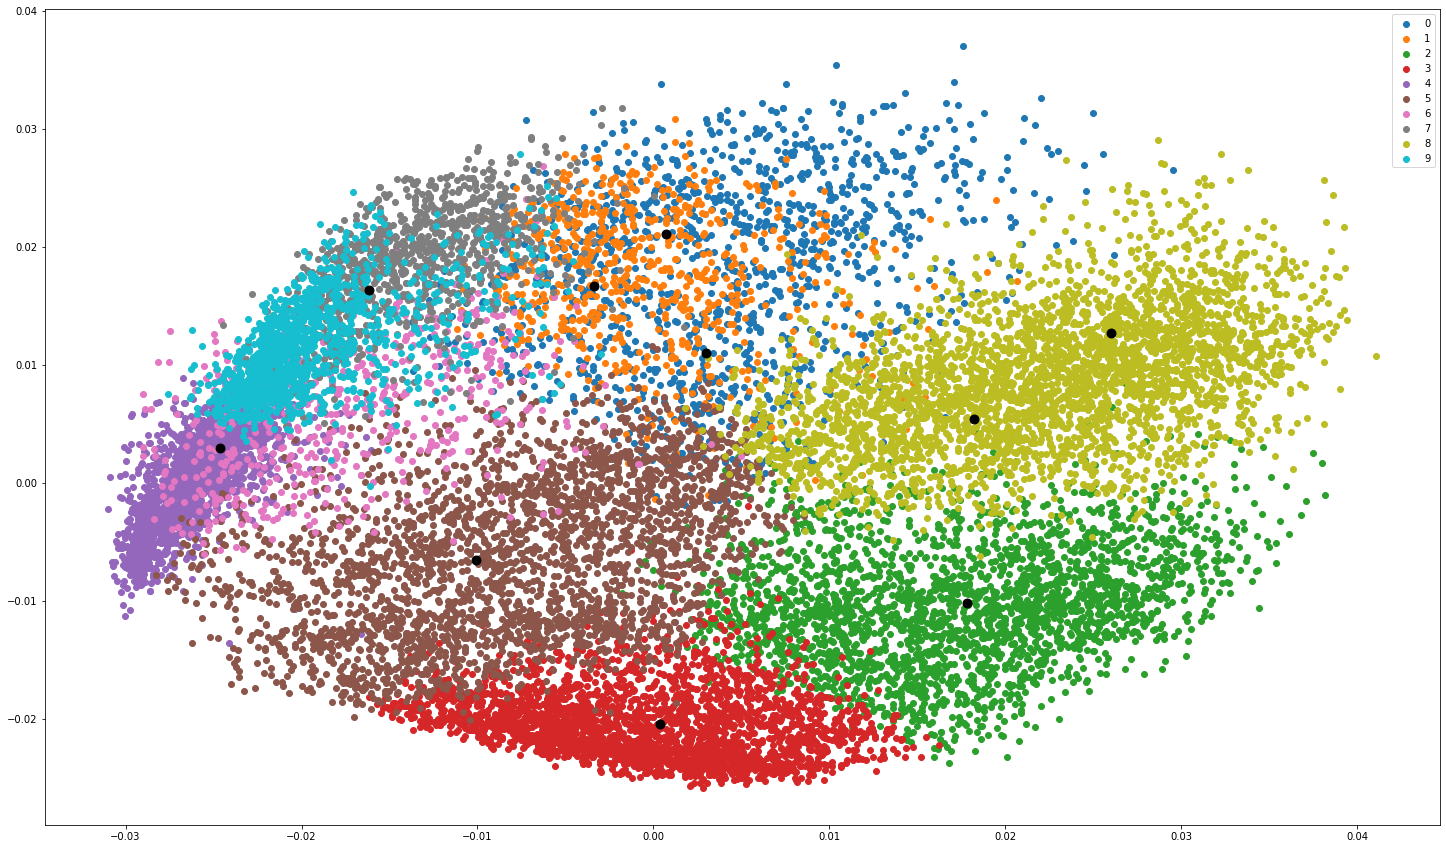

In [ ]:

u_labels = np.unique(y_minipred)
centroids = kmeans_cluster.cluster_centers_

plt.figure(figsize=(25,15))

#plotting the results with cluster centroids
for i in u_labels:
  flabel = X_train[y_minipred == i]
  plt.scatter(flabel.iloc[:,0].values , flabel.iloc[:,1].values, label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='k')
plt.legend()
plt.show()


In [ ]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
pd.crosstab(y_minipred, y_train, margins=True)

Comparing k-means clusters against the data:


label,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,16,1,32,1,12,2,48,0,1105,0,1217
1,0,0,0,0,0,18,0,7,0,652,677
2,1154,82,40,594,281,0,386,0,20,2,2559
3,48,1630,5,891,59,1,24,0,5,2,2665
4,4,0,0,0,0,919,1,978,59,13,1974
5,523,71,529,321,296,89,678,0,294,12,2813
6,0,0,0,0,0,422,0,9,4,129,564
7,0,0,0,0,0,63,0,89,3,835,990
8,58,21,1159,22,1282,0,662,0,88,1,3293


In [ ]:
# Rand Index Score
print("rand index score of minibatch Kmeans: {}".format(rand_index_score(y_train, y_minipred)))

# Adjusted Random Score
print("adjusted rand score of minibatch Kmeans: {}".format(metrics.adjusted_rand_score(y_train, y_minipred)))

rand index score of minibatch Kmeans: 0.8658897840003457
adjusted rand score of minibatch Kmeans: 0.3343439557888896


##3. DBSCAN 

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,25)

for i in range(2,25):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 1
Number of clusters when min_samples=2 is: 1
Number of clusters when min_samples=3 is: 1
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of clusters 

In [ ]:
# Rand Index Score
print("rand index score of DBSCAN: {}".format(rand_index_score(y_train, clusters)))

# Adjusted Random Score
print("adjusted rand score of DBSCAN: {}".format(metrics.adjusted_rand_score(y_train, clusters)))


rand index score of DBSCAN: 0.10003986023914908
adjusted rand score of DBSCAN: 0.0


##4. Hierarchical Clustering

###The 3 different linkage methods

In [ ]:
# Ward agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=10)

# Fit model
clusters = agg_cluster.fit_predict(X_std)


print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method ward: 0.36919280746821437
Silhouette score of linkage method ward: 0.16051830351352692
------------------------------------------------


In [ ]:
# Complete agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=10)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method complete: 0.32508122020866304
Silhouette score of linkage method complete: 0.1358424574136734
------------------------------------------------


In [ ]:
# Average Agglomerative Clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=10)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))


ARI score of linkage method average: 0.30792153686997625
Silhouette score of linkage method average: 0.12556734681129456


##5. Gaussian Mixture

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score: 0.15037150103748495
Silhouette score: 0.23345263302326202


## Compare covariance parameters
###GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:
###* full: This is the default. Each component has its own general covariance matrix.
###* tied: All components share the same general covariance matrix.
###* diag: Each component has its own diagonal covariance matrix.
###* spherical: Each component has its own single variance. 

In [ ]:
# Convert training set to dataframe
X_train = pd.DataFrame(X_train_reduced)
X_val = pd.DataFrame(X_val_reduced)

pca = PCA(2)
X_std = pca.fit_transform(X_train)
print(X_std.shape)

(18000, 2)


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y_train, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.10140427623718437
Silhouette score with covariance_type=full: 0.35408785939216614
------------------------------------------------------
ARI score with covariance_type=tied: 0.13879322821513126
Silhouette score with covariance_type=tied: 0.3997611999511719
------------------------------------------------------
ARI score with covariance_type=diag: 0.06854626785190801
Silhouette score with covariance_type=diag: 0.28645074367523193
------------------------------------------------------
ARI score with covariance_type=spherical: 0.06463736727260867
Silhouette score with covariance_type=spherical: 0.27422335743904114
------------------------------------------------------


### ARI scores looks the same across all types but the silhouette scores is highest on "tied" and lowest on "spherical"

### Based on clustering comparisons of K-Means/miniKMeans and DBSCAN, K-Means clearly scored higher in its ARI and visual predictions based on a closer prediction scores to ground truth. In this case, since we know the number of clusters based on the label column, it gives us ground truth to compare to

### With Hierarchical clustering agglomerative clustering, the Ward method using euclidean metric gave the best ARI and silhouette score. It looks like using PCA to reduce dimensionality is needed before applying hierarchical clustering.